# Sentiment Analysis of Movie Reviews
### GA DSI-SG-26 Capstone
> By: Matthew Lio
---

Project notebook organisation:

1. Data Cleaning and EDA (current notebook)
2. Lexicon-based Models
3. Binary Classification ML Models
4. Deep Learning Models

# 1. Data Cleaning and EDA
---

### Contents:
- [Introduction](#Introduction)
- [Problem Statement](#Problem-Statement)
- [Methodology](#Methodology)
- [Summary of Results](#Summary-of-Results)
- [Library Imports](#Library-Imports)
- [Data Import and First Look](#Data-Import-and-First-Look)
- [Data Cleaning](#Data-Cleaning)
- [Tokenizing and Lemmatizing](#Tokenizing-and-Lemmatizing)
- [Preprocessing Function](#Preprocessing-Function)
- [EDA](#EDA)
- [EDA (Without Removal of Stopwords)](#EDA-(Without-Removal-of-Stopwords))
- [Preprocessing and Export CSV](#Preprocessing-and-Export-CSV)

## Introduction

Any business is obliged to understand their clients, like their needs, opinions, and their satisfaction with the product. The best way to obtain that understanding is via customers' feedback, through proper channels in the form of feedback and reviews. Large web-based companies in this age are putting heavy emphasis on obtaining these customers' reviews, some by incentivising customers to leave reviews and feedback on their website, after receiving the product or service. By active collection of these data, companies would be informed about their own shortcomings, as well as suggestions for improvement on their products from the end-users. This would give companies a huge advantage for change and improvement on their products and services, which would greatly improve customers' experience and satisfaction. Those, in turn, translate to increase in customer pool, revenue, and overall growth of the business. We can thus see that customers' feedback are a crucial form of data and opinion mining that should not be ignored.

Sentiment analysis is a natural language processing (NLP) technique used to determine whether the data has positive or negative sentiments. It is the task of classifying polarity of a given text, sentence or document, whether expressed opinions in the given texts or sentences are positive or negative. Sentiment analysis is often performed to help businesses monitor brand and product sentiment in customer feedback and reviews, in order to understand customer needs. In the case of web-based companies, there is a need to analyse hundreds of thousands of opinions to different products, and simply searching for pre-defined "good" or "bad" words in the comments is not enough. With the rise of machine learning, in particular, sentiment analysis and neural networks, the problem of understanding the emotional tone of a text can be solved with high accuracy. By getting to know the emotional sentiments of reviews, effective feedback can be obtained for the improvement of the business.

## Problem Statement

Companies nowadays are expanding their opinion mining and data collection beyond just reviews on their websites. They are sponsoring content creators, like YouTubers or influencers, their products for review. Some of these content creators that specializes in creating review content, are not even sponsored. They review the products simply because they have multiple fans and followers whom are eager to discuss about the products, services or content these content creators are reviewing about.

This creates an issue of ignored data. These discussions in the comments are a goldmine of crucial untapped data that companies of the reviewed products can utilize. Some popular websites with these wealth of data, even contain thousands of comments that reviews and provide insights on how products can be improved. Popular websites include media streaming ones like YouTube, social media websites like Instagram and Facebook, tech review websites like rtings.com, techradar.com, general posts websites like Reddit and Medium, and last but not least, news articles websites like The Straits Times (they do reviews on movies, books, tech, restaurants, and even concerts). Reviews in the comment sections of these websites are largely ignored, with no form of sentiment analysis done to retrieve insights by the companies. It seems that there are still so many areas where sentiment analysis can be utilized.

We want to create a model that classifies the polarities of sentiments effectively in texts. With thousands of comments in the aforementioned websites, it would be valuable if these comments are classified according to positive or negative sentiments, so that companies can easily view more useful comments that provides insights for improvement.

## Methodology

We will be examining various techniques of how sentiment analysis can be applied. By training various techniques and models, we can then do a comparison between them, and choose the best performing one out of all as our production model.

Accuracy would be the key metric to observe, as well as specificity, which places more emphasis on the correct classification of negative reviews. As such, our model will be tuned towards high accuracy and specificity. This is because reviews with negative sentiments in general tend to contain the shortcomings of the product, and are also more likely to contain suggestive feedback as compared to positive reviews.

The dataset we chose for this project is the IMDB dataset. The reason we chose this dataset is because it contains balanced data, as the number of both positive and negative sentimental reviews are almost a direct fifty percent split. With a balanced dataset, it would enable us to adequately train our models for effective classification of both polarities, which we hope would help increase the accuracy of identifying both positive and negative sentiments.

## Summary of Results

In this project, various machine learning models were used for sentiment analysis. They include lexicon-based models, machine learning models and deep learning recurrent neural network (RNN). The best performing model was the Logistic Regression with TF-IDF Vectorizer, and it performed above expectations, with scores that outperformed all other models.

## Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
import scipy.stats as stats

import regex as re

from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.metrics.pairwise import cosine_similarity

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 400

## Data Import and First Look

This dataset from [Kaggle](https://www.kaggle.com/georgebredis/large-movie-review-dataset?select=IMBD_Train.csv) comes in both train and test datasets. They consist of the same columns. The reason why we choose a dataset from IMDB is because movie reviews are very detailed and gives us a lot to explore in terms of sentiment analysis, and also the ratings of this dataset are quite evenly distributed in terms of being positive or negative.

Here, we take a look at the train dataset, clean it and do some EDA on it.

In [2]:
# load in train dataset
train = pd.read_csv('../data/IMBD_Train.csv', nrows = 10000)

In [3]:
# taking away 'Unnamed: 0' column
train.drop('Unnamed: 0', axis = 1, inplace=True)

In [4]:
# lowercase all column names
train.columns = [i.lower() for i in train.columns]

In [5]:
train

,text,sentiment,rate
0,"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/ti...",1,10
1,"Words can't describe how bad this movie is. I can't explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clichés, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding t...",0,1
2,"Everyone plays their part pretty well in this ""little nice movie"". Belushi gets the chance to live part of his life differently, but ends up realizing that what he had was going to be just as good or maybe even better. The movie shows us that we ought to take advantage of the opportunities we have, not the ones we do not or cannot have. If U can get this movie on video for around $10, it´d be ...",1,10
3,"There are a lot of highly talented filmmakers/actors in Germany now. None of them are associated with this ""movie"".<br /><br />Why in the world do producers actually invest money in something like this this? You could have made 10 good films with the budget of this garbage! It's not entertaining to have seven grown men running around as dwarfs, pretending to be funny. What IS funny though is t...",0,1
4,"I've just had the evidence that confirmed my suspicions. A bunch of kids, 14 to 22 put on the DVD of ""Titanic"" on a fantastic state of the art mega screen home entertainment type deal. Only two of them had actually seen it before. But they all had seen the moment of Kate, Leo and Celine Dion so many times that most of them felt they had seen the whole movie. Shortly after the epic started, the...",0,2
...,...,...,...
9995,"I remember seeing this years ago when it first came out and I was floored by Parker Posey's performance. And the movie was pretty good also. For anyone who's spent a little too much time in the nightclub/after-hours scene, this movie will have a special charm for you. Not too serious, mostly funny, and Parker Posey definitely blazes her talented way through this indie gem.<br /><br />I especia...",1,8
9996,"Now days, most people don't watch classic movies, such as this. Most of friends only watch movies from the '90s to present. Thats kinda stingy. <br /><br />Most old movies like this are masterpieces, unique in their own way. Only because, back when these movies were being thought of and made, thats when ideas were fresh. Now people strain just to think of new ideas. <br /><br />Anyway, to the ...",1,9
9997,"Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.",0,4
9998,"This movie blows - let's get that straight right now. There are a few scene gems nestled inside this pile of crap but none can redeem the limp plot. Colin Farrel looks like Brad Pitt in ""12 Monkeys"" and acts in a similar manner. I normally hate Colin because he is a fairy in general but he's OK in this movie. There were two plot lines in this movie-= one about a kid who throws rocks through wi...",0,3


In [6]:
train.info()
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       10000 non-null  object
 1   sentiment  10000 non-null  int64 
 2   rate       10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


The dataset consists of 3 columns:
- Text: the review itself. This column consists of all our main corpuses
- Sentiment: Binary sentiment classification of 0 (negative) and 1 (positive)
- Rate: Ratings from 1 to 10, given along with the reviews in our dataset. 1 lowest and most negative, to 10, most positive

Let us go through all the columns and do some preliminary EDA.

### Rate and Sentiment

In [7]:
# a look at ratings.
# there are no ratings of 5 and 6
train['rate'].value_counts()

1     2074
10    1883
8     1189
4     1091
7     1007
2      924
3      921
9      911
Name: rate, dtype: int64

In [8]:
# sentiment classified as binary
train['sentiment'].value_counts()

0    5010
1    4990
Name: sentiment, dtype: int64

In [9]:
# splitting main train dataset to explore each sentiment
df_neg = train[train['sentiment'] == 0].reset_index(drop=True)
df_pos = train[train['sentiment'] == 1].reset_index(drop=True)

In [10]:
# negative sentiment reviews rate from 1 to 4
df_neg['rate'].value_counts()

1    2074
4    1091
2     924
3     921
Name: rate, dtype: int64

In [11]:
# positive sentiment reviews rate from 7 to 10
df_pos['rate'].value_counts()

10    1883
8     1189
7     1007
9      911
Name: rate, dtype: int64

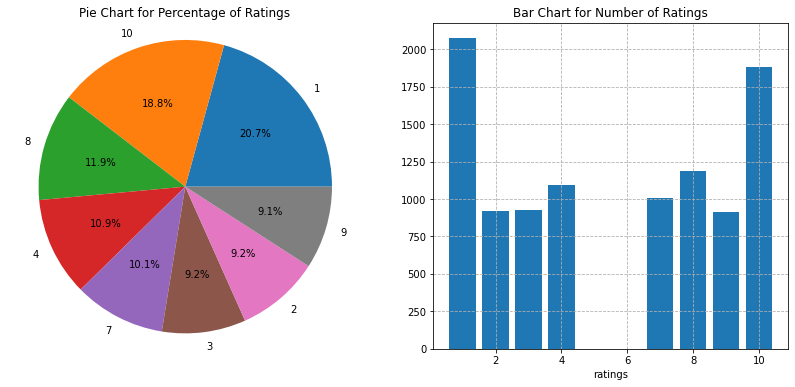

In [12]:
# Creating a pie chart for categories
ratings = [1, 10, 8, 4, 7, 3, 2, 9]

plt.figure(figsize=(14,6))
ax1 = plt.subplot(1,2,1)
ax1 = plt.pie(train['rate'].value_counts(), labels = ratings, autopct='%0.1f%%')
plt.axis('equal')
plt.title('Pie Chart for Percentage of Ratings')

ax2 = plt.subplot(1,2,2)
plt.grid(linestyle = '--')
ax2 = plt.bar(ratings, train['rate'].value_counts())
plt.xlabel('ratings')
plt.title('Bar Chart for Number of Ratings')

plt.show()

From the very first look, seems like there are no null values, and that this is a balanced dataset. This will be good for model training, as balanced data will equally train both polarity (positive and negative) sides of the sentiment. Also, with the binary classification based on sentiment given to us, we can first explore the words that made these reviews either positive (1) or negative (0). Negative sentiment reviews have ratings from 1 to 4, while positive sentiment reviews have ratings from 7 to 10.

We also note that there are no rating scores of 5 and 6. This might not be much of an impact as neutral words might be less useful to us.

### Text

In [13]:
# example of extreme positive-polarized review
# review with positive sentiment, rating 10
train['text'][0]

"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

In [14]:
# example of extreme negative-polarized review
# review with negative sentiment, rating 1
train['text'][1]

'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clichés, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you\'re choice over this one, even the "Turbulence"-movie

From the looks of the first 2 reviews above, the very first review shows positive sentiment, with a perfect rating score of 10. The next review right after is a polar opposite; it has a negative sentiment, with the lowest rating score of 1. Reading these reviews, we can already see that there are some negative sentiment words in the positive review, and the opposite can be said for the negative review consisting of positive words. It will definitely be a challenge for our model to make sense out of these (sarcasm etc.), of all the negative words in a perfectly positive review (and vice versa).

## Data Cleaning

In this section, we will be doing data cleaning on our dataset. This includes 2 very important cleaning steps: Remove all the special characters, as well as the **\<br>** from the corpuses. This is because we found out that there are a lot of \<br> in the corpuses, and they will really mess with our data. Other cleaning steps will also be done in this section.

In [15]:
# remove function using regex
def regex_remove(df, col, regex_rem):
    return df[col].replace(regex=True, inplace=True, to_replace=regex_rem, value=r' ')

In [16]:
# basic cleaning function
def basic_clean(df):
    # drop 'Unnamed: 0' column
    df.drop('Unnamed: 0', axis = 1, inplace=True)
    
    # lowercase letters in columns
    df.columns = [i.lower() for i in df.columns]
    
    # using regex to remove <br>
    regex_remove(df, 'text', r'(?:^|\W)br(?:$|\W)')
    
    # using regex to remove special characters
    regex_remove(df, 'text', r'[^a-zA-Z \n\.]')
    
    return df

### Removing links

Some reviews contain website links which mostly consist of meaningless words, which we will proceed to remove using regex.

In [17]:
# checking if dataset contains links in the reviews
train_link = train[train['text'].str.contains('http')]
train_link.head()

,text,sentiment,rate
38,"I don't hand out ""ones"" often, but if there was ever a film that deserved this sort of attention, it's ""Gas!"" This is self-indulgent crap that reaches for some of the ambiance of M*A*S*H and falls completely flat on its face in the attempt.<br /><br />I see what Corman was going for - Malcolm Marmorstein and Elliott Gould tried to reproduce Gould's deathless role in the original movie version ...",0,1
172,"I am watching the series back to back as fast as possible. I am attempting to watch all things Star Trek. This is month 3 and I am now on Season 3 of TNG and I have already gone thru DS9 in its entirety. Star Trek is the greatest television phenomenon ever achieved.<br /><br />""Shades of Grey"" is the first recap episode in the TNG series. Having just watched the shows, these clips were fresh i...",1,8
292,"Once upon a time there was a science fiction author named H. Beam Piper who wrote a classic book named ""Little Fuzzy"" which was about a man discovering a race of adorable little fuzzy humanoids on another planet. Mr. Piper died in 1964, but Hollywood and many of today's authors starting looting his grave before his cadaver got cold. This is the book where they got the idea for Ewoks from.<br /...",0,2
513,"One of the more satisfying Western all'italiana, Johnny Yuma has the freshness of many WAI made during the heyday of the genre and is highly recommended for fans of the genre or offbeat, intelligent cinema.<br /><br />Johnny Yuma is, in most respects, not terribly original, but this actually does not count against it. The success of a genre film depends on how well it meets the audience's expe...",1,7
918,"Years ago a movie going friend and I went to see a horror film that we thought would be good because it starred John Cassavetes. For the uninitiated, John Cassavettes was an actor, screen writer and director (married to actress Gena Rowlands), nominated for Oscars three times, who wrote and directed a variety of good low-budget films using his income as an actor to keep himself afloat. Up unti...",0,1


In [18]:
# a look at a review with links
train_link['text'][172]

'I am watching the series back to back as fast as possible. I am attempting to watch all things Star Trek. This is month 3 and I am now on Season 3 of TNG and I have already gone thru DS9 in its entirety. Star Trek is the greatest television phenomenon ever achieved.<br /><br />"Shades of Grey" is the first recap episode in the TNG series. Having just watched the shows, these clips were fresh in my mind, but I noticed how a couple of them were re-shot because the film looked better. Season 1 always seemed real dark and ugly to me - and the actors looked silly, like they didn\'t fit in their own skins.<br /><br />The show is essentially just made of up a greatest hits of the happiest and saddest moments in Riker\'s life on the Enterprise up until this point. The Data and Riker scene in the holo-deck is a classic moment of new friendship. My other favorite is when the 2nd officer on the Klingon ship challenges Riker\'s authority as first officer and Riker beat the living CRAP out of that

In [19]:
# regular expression to select all links
regex_link = r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)'

In [20]:
# using regex to remove links in reviews
train['text'].replace(regex=True, inplace=True, to_replace=regex_link, value=r' ')

In [21]:
# double checking if it works
train['text'][172]

'I am watching the series back to back as fast as possible. I am attempting to watch all things Star Trek. This is month 3 and I am now on Season 3 of TNG and I have already gone thru DS9 in its entirety. Star Trek is the greatest television phenomenon ever achieved.<br /><br />"Shades of Grey" is the first recap episode in the TNG series. Having just watched the shows, these clips were fresh in my mind, but I noticed how a couple of them were re-shot because the film looked better. Season 1 always seemed real dark and ugly to me - and the actors looked silly, like they didn\'t fit in their own skins.<br /><br />The show is essentially just made of up a greatest hits of the happiest and saddest moments in Riker\'s life on the Enterprise up until this point. The Data and Riker scene in the holo-deck is a classic moment of new friendship. My other favorite is when the 2nd officer on the Klingon ship challenges Riker\'s authority as first officer and Riker beat the living CRAP out of that

### Using Regex to remove \<br> and special characters

As mentioned above, most reviews contain a a huge amount of "\<br>", and these would confuse our model as a very common word, which in reality makes no sense at all. We will have to remove it to prevent it from messing with our data.

Special characters will also be removed. While a small number of reviews were observed to contain some emojis made with special characters, the number of them is too little to justify keeping special characters that mostly add to the noise.

In [22]:
# checking for <br> and special characters
train['text'][172]

'I am watching the series back to back as fast as possible. I am attempting to watch all things Star Trek. This is month 3 and I am now on Season 3 of TNG and I have already gone thru DS9 in its entirety. Star Trek is the greatest television phenomenon ever achieved.<br /><br />"Shades of Grey" is the first recap episode in the TNG series. Having just watched the shows, these clips were fresh in my mind, but I noticed how a couple of them were re-shot because the film looked better. Season 1 always seemed real dark and ugly to me - and the actors looked silly, like they didn\'t fit in their own skins.<br /><br />The show is essentially just made of up a greatest hits of the happiest and saddest moments in Riker\'s life on the Enterprise up until this point. The Data and Riker scene in the holo-deck is a classic moment of new friendship. My other favorite is when the 2nd officer on the Klingon ship challenges Riker\'s authority as first officer and Riker beat the living CRAP out of that

In [23]:
# using regex to remove <br>
regex_remove(train, 'text', r'(?:^|\W)br(?:$|\W)')

# using regex to remove special characters
regex_remove(train, 'text', r'[^a-zA-Z\' \n\.]')

In [24]:
# Checking the result after cleaning with regex
train['text'][172]

"I am watching the series back to back as fast as possible. I am attempting to watch all things Star Trek. This is month   and I am now on Season   of TNG and I have already gone thru DS  in its entirety. Star Trek is the greatest television phenomenon ever achieved.       Shades of Grey  is the first recap episode in the TNG series. Having just watched the shows  these clips were fresh in my mind  but I noticed how a couple of them were re shot because the film looked better. Season   always seemed real dark and ugly to me   and the actors looked silly  like they didn't fit in their own skins.      The show is essentially just made of up a greatest hits of the happiest and saddest moments in Riker's life on the Enterprise up until this point. The Data and Riker scene in the holo deck is a classic moment of new friendship. My other favorite is when the  nd officer on the Klingon ship challenges Riker's authority as first officer and Riker beat the living CRAP out of that Klingon. Then 

### Checking for same reviews in both sentiments

Checking for same reviews in both sentiments just in case (there is none).

In [25]:
# Making sure there are no same reviews in both positive and negative reviews
common_posts = pd.merge(df_neg, df_pos, 
                        left_on = 'text',
                        right_on = 'text', 
                        how = 'outer')
common_posts[~common_posts.isnull().any(axis=1)]

,text,sentiment_x,rate_x,sentiment_y,rate_y


### Checking for duplicates

Checking for duplicated reviews just in case. Turned out the dataframe does indeed contain duplicated reviews. Not sure the reason why, but the duplicated ones will be removed.

In [26]:
# using 'sentiment' column to see initial state of dataframe/no. of rows
train['sentiment'].value_counts()

0    5010
1    4990
Name: sentiment, dtype: int64

In [27]:
# checking for duplicates
duplicate = train[train.duplicated('text')]
duplicate

,text,sentiment,rate
1975,This guy has no idea of cinema. Okay it seems he made a few interestig theater shows in his youth and about two acceptable movies that had success more of political reasons cause they tricked the communist censorship. This all is very good but look carefully HE DOES NOT KNOW HIS JOB The scenes are unbalanced without proper start and and with a disordered content and full of emptiness. H...,0,1
3573,I feel like I've just watched a snuff film....a beautifully acted taut engrossing and horrible thing A two hour litany of perversion in the most basic and all inclusive sense of the word sexual violence and torture rape decapitation incest corruption live burial and abuse abuse abuse. No redemption whatsoever. And I WAS entertained. I couldn't stop watching. What does this say abou...,0,1
3932,.......Playing Kaddiddlehopper Col San Fernando etc. the man was pretty wide ranging and a scream. I love watching him interact w Amanda Blake or Don Knotts or whomever he clearly was having a ball and I think he made it easier on his guests as well so long as they Knew ahead of time it wasn't a disciplined take kind of production. Relax and be loose was clearly the name of the game ...,1,8
5189,I was one of those few Americans that grew up with all of Gerry Andersen's marvelous creations. Thunderbirds was a great series for the time and would have made a great action adventure movie if only the writers could have figured out where to target it. I expected it to be a romp but I did not expect it to aim at such a low age group. Like Lost in Space this could have been both visu...,0,4
5658,How has this piece of crap stayed on TV this long It's terrible. It makes me want to shoot someone. It's so fake that it is actually worse than a s sci fi movie. I'd rather have a stroke than watch this nonsense. I remember watching it when it first came out. I thought hey this could be interesting then I found out how absolutely insanely ridiculously stupid it really was. It was so b...,0,1
5681,You know all those letters to Father Christmas and Jesus that are sent every year Well it turns out that they are not actually delivered but dropped off in a half forgotten corner of the post office to rot unless some bright spark figures out a way of posting them. As bizarre settings go it's a winner and one which perfectly fits the strange movie that is Dead Letter Office . Having sa...,0,4
6379,I find it rather useless to comment on this movie for the simplest reason that it has nothing to comment upon.It's similar to a rotten egg which has nothing good to show to the world excerpt for the fact that it is rotten as other endless number of eggs have been before it. But since a comment is mandatory for such a grandiose insignificance ... Filth is definitely the proper word to d...,0,1
6501,In the visitors was an enormous hit in France. So the sequence was inevitable and unfortunately this sequence ranks among the worst ones ever made. This is a movie that doesn't keep its promises. Indeed it's supposed to tell a sole story. Jean Reno must go in the twentieth century and take Christian Clavier back in the Middle Ages so that time can normally follow its course. T...,0,2
7676,I'm gonna tip the scales here a bit and say I enjoyed this. However the cartoon is really only going to appeal to those who have very absurdist tendencies. It's definitely something that most people will not get as is the nature of absurdism. the animation is horrible but yes that's the point. The main character is foul mouthed violent and stupid. no redeeming qualities whatsoever. ...,1,7
7897,You do realize that you've been watching the EXACT SAME SHOW for eight years right I could understand the initial curiosity of seeing strangers co exist on an Island but you'd think that after watching unkempt stink ladened heroes run roughshod through the bush with an egg on a spoon for half a decade would be enough to get you to commit to something a little more original and inte

In [28]:
# checking for duplicates
train[train['text'].str.contains('This guy has no idea of cinema.')]

,text,sentiment,rate
32,This guy has no idea of cinema. Okay it seems he made a few interestig theater shows in his youth and about two acceptable movies that had success more of political reasons cause they tricked the communist censorship. This all is very good but look carefully HE DOES NOT KNOW HIS JOB The scenes are unbalanced without proper start and and with a disordered content and full of emptiness. H...,0,1
1975,This guy has no idea of cinema. Okay it seems he made a few interestig theater shows in his youth and about two acceptable movies that had success more of political reasons cause they tricked the communist censorship. This all is very good but look carefully HE DOES NOT KNOW HIS JOB The scenes are unbalanced without proper start and and with a disordered content and full of emptiness. H...,0,1


In [29]:
# checking for duplicates
train[train['text'].str.contains('How has this piece of crap stayed')]

,text,sentiment,rate
1735,How has this piece of crap stayed on TV this long It's terrible. It makes me want to shoot someone. It's so fake that it is actually worse than a s sci fi movie. I'd rather have a stroke than watch this nonsense. I remember watching it when it first came out. I thought hey this could be interesting then I found out how absolutely insanely ridiculously stupid it really was. It was so b...,0,1
5658,How has this piece of crap stayed on TV this long It's terrible. It makes me want to shoot someone. It's so fake that it is actually worse than a s sci fi movie. I'd rather have a stroke than watch this nonsense. I remember watching it when it first came out. I thought hey this could be interesting then I found out how absolutely insanely ridiculously stupid it really was. It was so b...,0,1


In [30]:
# there are really duplicated reviews
# Time to drop these duplicates
train.drop_duplicates('text', keep='first', inplace=True)
train.reset_index(drop=True, inplace=True);

In [31]:
# 13 duplicates dropped
# 10 from negative reviews
# 3 from positive reviews
train['sentiment'].value_counts()

0    5000
1    4987
Name: sentiment, dtype: int64

### Lowercase all letters

Lowercasing all the letters in our corpuses for standardization.

In [32]:
train['text'] = train['text'].str.lower()

In [33]:
# check after lowercasing texts
train

,text,sentiment,rate
0,zero day leads you to think even re think why two boys young men would do what they did commit mutual suicide via slaughtering their classmates. it captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own mutual world via coupled destruction. it is not a perfect movie but given what money time the...,1,10
1,words can't describe how bad this movie is. i can't explain it by writing only. you have too see it for yourself to get at grip of how horrible a movie really can be. not that i recommend you to do that. there are so many clich s mistakes and all other negative things you can imagine here that will just make you cry. to start with the technical first there are a lot of mistakes regarding t...,0,1
2,everyone plays their part pretty well in this little nice movie . belushi gets the chance to live part of his life differently but ends up realizing that what he had was going to be just as good or maybe even better. the movie shows us that we ought to take advantage of the opportunities we have not the ones we do not or cannot have. if u can get this movie on video for around it d be ...,1,10
3,there are a lot of highly talented filmmakers actors in germany now. none of them are associated with this movie . why in the world do producers actually invest money in something like this this you could have made good films with the budget of this garbage it's not entertaining to have seven grown men running around as dwarfs pretending to be funny. what is funny though is that th...,0,1
4,i've just had the evidence that confirmed my suspicions. a bunch of kids to put on the dvd of titanic on a fantastic state of the art mega screen home entertainment type deal. only two of them had actually seen it before. but they all had seen the moment of kate leo and celine dion so many times that most of them felt they had seen the whole movie. shortly after the epic started the...,0,2
...,...,...,...
9982,i remember seeing this years ago when it first came out and i was floored by parker posey's performance. and the movie was pretty good also. for anyone who's spent a little too much time in the nightclub after hours scene this movie will have a special charm for you. not too serious mostly funny and parker posey definitely blazes her talented way through this indie gem. i especially li...,1,8
9983,now days most people don't watch classic movies such as this. most of friends only watch movies from the ' s to present. thats kinda stingy. most old movies like this are masterpieces unique in their own way. only because back when these movies were being thought of and made thats when ideas were fresh. now people strain just to think of new ideas. anyway to the movie. for t...,1,9
9984,working with one of the best shakespeare sources this film manages to be creditable to it's source whilst still appealing to a wider audience. branagh steals the film from under fishburne's nose and there's a talented cast on good form.,0,4
9985,this movie blows let's get that straight right now. there are a few scene gems nestled inside this pile of crap but none can redeem the limp plot. colin farrel looks like brad pitt in monkeys and acts in a similar manner. i normally hate colin because he is a fairy in general but he's ok in this movie. there were two plot lines in this movie one about a kid who throws rocks through wi...,0,3


In [34]:
train['text'][172]

"i am watching the series back to back as fast as possible. i am attempting to watch all things star trek. this is month   and i am now on season   of tng and i have already gone thru ds  in its entirety. star trek is the greatest television phenomenon ever achieved.       shades of grey  is the first recap episode in the tng series. having just watched the shows  these clips were fresh in my mind  but i noticed how a couple of them were re shot because the film looked better. season   always seemed real dark and ugly to me   and the actors looked silly  like they didn't fit in their own skins.      the show is essentially just made of up a greatest hits of the happiest and saddest moments in riker's life on the enterprise up until this point. the data and riker scene in the holo deck is a classic moment of new friendship. my other favorite is when the  nd officer on the klingon ship challenges riker's authority as first officer and riker beat the living crap out of that klingon. then 

## Tokenizing and Lemmatizing

In this section, we will be tokenizing and lemmatizing our texts. This will create individual words (tokenized) in a list which are converted to their basic form (lemmatize). Words in their basic form may be useful to us when training our model by improving its accuracy. After these 2 steps, we will be joining the individual words back into texts.

Lemmatizing will also erroneously change "was" and "has", to "wa" and "ha". Later in our preprocessing function, we will be using regex to help us remove the unwanted "wa" and "ha".

In [35]:
# initializing tokenizer and lemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# short function for doing both tokenizing and lemmatizing
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [36]:
# applying function our dataframe
train['text'] = train['text'].apply(lemmatize_text)

In [37]:
# joining back the individual list of words into text in combine column
train['text'] = train['text'].map(' '.join)

In [38]:
# checking after tokenizing and lemmatizing
train['text'][172]

"i am watching the series back to back a fast a possible. i am attempting to watch all thing star trek. this is month and i am now on season of tng and i have already gone thru d in it entirety. star trek is the greatest television phenomenon ever achieved. shade of grey is the first recap episode in the tng series. having just watched the show these clip were fresh in my mind but i noticed how a couple of them were re shot because the film looked better. season always seemed real dark and ugly to me and the actor looked silly like they didn't fit in their own skins. the show is essentially just made of up a greatest hit of the happiest and saddest moment in riker's life on the enterprise up until this point. the data and riker scene in the holo deck is a classic moment of new friendship. my other favorite is when the nd officer on the klingon ship challenge riker's authority a first officer and riker beat the living crap out of that klingon. then the admiral kick his a but good. this 

## Preprocessing Function

### Preprocessing Function for Train and Test

In [39]:
def preprocess_df(df):
    
    # taking away 'Unnamed: 0' column
    df.drop('Unnamed: 0', axis = 1, inplace=True)
    
    # lowercase all column names
    df.columns = [i.lower() for i in df.columns]
    
    # regular expression to select all links
    regex_link = r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)'
    
    # using regex to remove links in reviews
    df['text'].replace(regex=True, inplace=True, to_replace=regex_link, value=r' ')
    
    # using regex to remove <br>
    df['text'].replace(regex=True, inplace=True, to_replace=r'(?:^|\W)br(?:$|\W)', value=r' ')
    
    # using regex to remove special characters
    df['text'].replace(regex=True, inplace=True, to_replace=r'[^a-zA-Z\' \n\.]', value=r' ')
    
    # dropping duplicates
    df.drop_duplicates('text', keep='first', inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    # lowercasing all letters
    df['text'] = df['text'].str.lower()
    
    # initializing tokenizer and lemmatizer
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    
    # short function for doing both tokenizing and lemmatizing
    def lemmatize_text(text):
        return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    
    # applying function our dataframe
    df['text'] = df['text'].apply(lemmatize_text)
    
    # joining back the individual list of words into text in combine column
    df['text'] = df['text'].map(' '.join)
    
    # removing "wa" and "ha" erroneously done by lemmatizing
    df['text'].replace(regex=True, inplace=True, to_replace=r'(?:^|\W)wa(?:$|\W)', value=r' ')
    df['text'].replace(regex=True, inplace=True, to_replace=r'(?:^|\W)ha(?:$|\W)', value=r' ')
    
    return df

## EDA

Import and preprocess data again for EDA.

In [40]:
# load in train dataset
train = pd.read_csv('../data/IMBD_Train.csv', nrows = 10000)

In [41]:
preprocess_df(train)

,text,sentiment,rate
0,zero day lead you to think even re think why two boy young men would do what they did commit mutual suicide via slaughtering their classmates. it capture what must be beyond a bizarre mode of being for two human who have decided to withdraw from common civility in order to define their own mutual world via coupled destruction. it is not a perfect movie but given what money time the filmmaker a...,1,10
1,word can't describe how bad this movie is. i can't explain it by writing only. you have too see it for yourself to get at grip of how horrible a movie really can be. not that i recommend you to do that. there are so many clich s mistake and all other negative thing you can imagine here that will just make you cry. to start with the technical first there are a lot of mistake regarding the airpl...,0,1
2,everyone play their part pretty well in this little nice movie . belushi get the chance to live part of his life differently but end up realizing that what he had going to be just a good or maybe even better. the movie show u that we ought to take advantage of the opportunity we have not the one we do not or cannot have. if u can get this movie on video for around it d be an investment,1,10
3,there are a lot of highly talented filmmaker actor in germany now. none of them are associated with this movie . why in the world do producer actually invest money in something like this this you could have made good film with the budget of this garbage it's not entertaining to have seven grown men running around a dwarf pretending to be funny. what is funny though is that the film's producer ...,0,1
4,i've just had the evidence that confirmed my suspicions. a bunch of kid to put on the dvd of titanic on a fantastic state of the art mega screen home entertainment type deal. only two of them had actually seen it before. but they all had seen the moment of kate leo and celine dion so many time that most of them felt they had seen the whole movie. shortly after the epic started they started to ...,0,2
...,...,...,...
9982,i remember seeing this year ago when it first came out and i floored by parker posey's performance. and the movie pretty good also. for anyone who's spent a little too much time in the nightclub after hour scene this movie will have a special charm for you. not too serious mostly funny and parker posey definitely blaze her talented way through this indie gem. i especially liked the diaz charac...,1,8
9983,now day most people don't watch classic movie such a this. most of friend only watch movie from the ' s to present. thats kinda stingy. most old movie like this are masterpiece unique in their own way. only because back when these movie were being thought of and made thats when idea were fresh. now people strain just to think of new ideas. anyway to the movie. for true fan of classic horror. t...,1,9
9984,working with one of the best shakespeare source this film manages to be creditable to it's source whilst still appealing to a wider audience. branagh steal the film from under fishburne's nose and there's a talented cast on good form.,0,4
9985,this movie blow let's get that straight right now. there are a few scene gem nestled inside this pile of crap but none can redeem the limp plot. colin farrel look like brad pitt in monkey and act in a similar manner. i normally hate colin because he is a fairy in general but he's ok in this movie. there were two plot line in this movie one about a kid who throw rock through windshield of movin...,0,3


In [42]:
# splitting main train dataset into each sentiment
df_neg = train[train['sentiment'] == 0].reset_index(drop=True)
df_pos = train[train['sentiment'] == 1].reset_index(drop=True)

### Review Length and Word Count

We first take a look at each review's length and word count.

#### Creating new columns for review length and word count

In [43]:
# review length
# all letters, inverted commas, spaces etc.
train['review_len'] = train['text'].map(len)

In [44]:
# review word count
train['review_word_count'] = train['text'].map(lambda x: len(x.split()))

In [45]:
# check dataframe
train.sort_values(by='review_word_count', ascending=True)

,text,sentiment,rate,review_len,review_word_count
8625,long boring blasphemous. never have i been so glad to see ending credit roll.,0,1,77,14
1747,a rating of doe not begin to express how dull depressing and relentlessly bad this movie is.,0,1,92,17
1518,this is the definitive movie version of hamlet. branagh cut nothing but there are no wasted moments.,1,10,100,17
7382,an unfunny unworthy picture which is an undeserving end to peter sellers' career. it is a pity this movie ever made.,0,1,116,21
1690,great movie especially the music etta james at last . this speaks volume when you have finally found that special someone.,0,1,122,21
...,...,...,...,...,...
196,this movie recently released on dvd in the u and i finally got the chance to see this hard to find gem. it even came with original theatrical preview of other italian horror classic like spasmo and beyond the darkness . unfortunately the preview were the best thing about this movie. zombi in a bizarre way is actually linked to the infamous lucio fulci zombie franchise which began in . similarl...,0,1,7279,1353
6840,polish film maker walerian borowczyk's la b te french aka the beast is among the most controversial and brave film ever made and a very excellent one too. this film tell everything that's generally been hidden and denied about our nature and our sexual nature in particular with the symbolism and silence of it images. the image may look wild perverse sick or exciting but they are all in relatio...,1,10,7730,1388
7309,warning doe contain spoilers. open your eye if you have not seen this film and plan on doing so just stop reading here and take my word for it. you have to see this film. i have seen it four time so far and i still haven't made up my mind a to what exactly happened in the film. that is all i am going to say because if you have not seen this film then stop reading right now. if you are still re...,1,10,7725,1479
5213,attention spoiler first of all let me say that rob roy is one of the best film of the 's. it an amazing achievement for all those involved especially the acting of liam neeson jessica lange john hurt brian cox and tim roth. michael canton jones painted a wonderful portrait of the honor and dishonor that men can represent in themselves. but alas... it constantly and unfairly get compared to bra...,1,9,9756,1798


#### Shortest reviews

In [46]:
train.sort_values(by='review_word_count', ascending=True)[['text']].head()

,text
8625,long boring blasphemous. never have i been so glad to see ending credit roll.
1747,a rating of doe not begin to express how dull depressing and relentlessly bad this movie is.
1518,this is the definitive movie version of hamlet. branagh cut nothing but there are no wasted moments.
7382,an unfunny unworthy picture which is an undeserving end to peter sellers' career. it is a pity this movie ever made.
1690,great movie especially the music etta james at last . this speaks volume when you have finally found that special someone.


are positive reviews longer or negative reviews?

#### Longest reviews

In [47]:
train.sort_values(by='review_word_count', ascending=False)[['text']].head()

,text
1360,titanic directed by james cameron present a fictional love story on the historical setting of the titanic. the plot is simple noncomplicated or not for those who love plot that twist and turn and keep you in suspense. the end of the movie can be figured out within minute of the start of the film but the love story is an interesting one however. kate winslett is wonderful a rose an aristocratic...
5213,attention spoiler first of all let me say that rob roy is one of the best film of the 's. it an amazing achievement for all those involved especially the acting of liam neeson jessica lange john hurt brian cox and tim roth. michael canton jones painted a wonderful portrait of the honor and dishonor that men can represent in themselves. but alas... it constantly and unfairly get compared to bra...
7309,warning doe contain spoilers. open your eye if you have not seen this film and plan on doing so just stop reading here and take my word for it. you have to see this film. i have seen it four time so far and i still haven't made up my mind a to what exactly happened in the film. that is all i am going to say because if you have not seen this film then stop reading right now. if you are still re...
6840,polish film maker walerian borowczyk's la b te french aka the beast is among the most controversial and brave film ever made and a very excellent one too. this film tell everything that's generally been hidden and denied about our nature and our sexual nature in particular with the symbolism and silence of it images. the image may look wild perverse sick or exciting but they are all in relatio...
196,this movie recently released on dvd in the u and i finally got the chance to see this hard to find gem. it even came with original theatrical preview of other italian horror classic like spasmo and beyond the darkness . unfortunately the preview were the best thing about this movie. zombi in a bizarre way is actually linked to the infamous lucio fulci zombie franchise which began in . similarl...


#### Distribution of review word count

C:\Users\chins\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


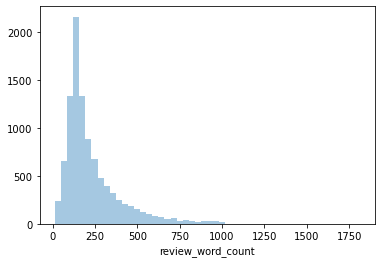

In [48]:
sns.distplot(train['review_word_count'], kde=False);

In [49]:
train['review_word_count'].value_counts().head()

# Most frequent word count: 125 words

125    93
124    91
128    85
129    78
133    76
Name: review_word_count, dtype: int64

#### Distribution of review length

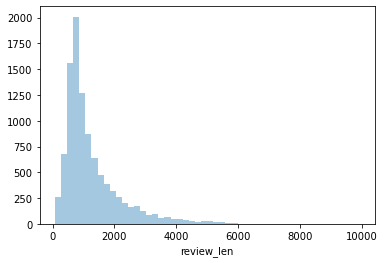

In [50]:
sns.distplot(train['review_len'], kde=False);

In [51]:
train['review_len'].value_counts().head()

# Most frequent review length: 650 characters

650    26
676    23
623    21
647    21
630    20
Name: review_len, dtype: int64

Distribution of both review length and word count have similar shapes. The most frequent word count is 125 words, while the most frequent review length is 650 characters. Let us explore if negative reviews are longer on average as compared to positive reviews.

### Distribution of Negative Reviews

In [52]:
# review word count for negative reviews
df_neg['review_word_count'] = df_neg['text'].map(lambda x: len(x.split()))

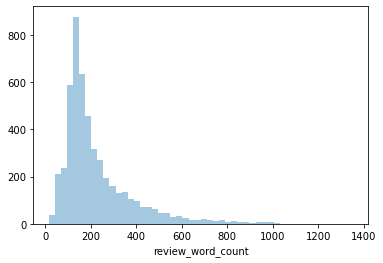

In [53]:
sns.distplot(df_neg['review_word_count'], kde=False);

In [54]:
df_neg['review_word_count'].value_counts().head()

# Most frequent number of words in negative reviews: 125 words

125    45
124    43
129    43
128    41
131    41
Name: review_word_count, dtype: int64

### Distribution of Positive Reviews

In [55]:
# review word count for positive reviews
df_pos['review_word_count'] = df_pos['text'].map(lambda x: len(x.split()))

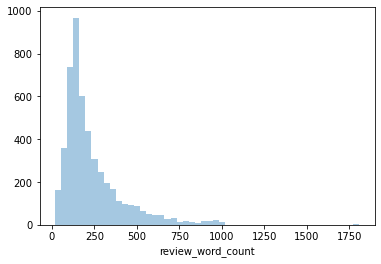

In [56]:
sns.distplot(df_pos['review_word_count'], kde=False);

In [57]:
df_pos['review_word_count'].value_counts().head()

# Most frequent number of words in positive reviews: 124 words

124    48
125    48
128    44
121    38
133    37
Name: review_word_count, dtype: int64

Initially, we thought that perhaps due to describing shortcomings, plus suggestions for improvement, that negative reviews would be longer on average as compared to positive reviews. Seems like that is not true, as the distribution of number of words for both positive and negative reviews are very similar. Different sentiments do not affect the number of words in the reviews.

### Common Words in Positive and Negative Reviews (With Removal of Stopwords)

We now take a look at the most common words in both positive and negative reviews. By using the transformer CountVectorizer, and utilising default sklearn's english stop words without any customised parameters, we can extract common words or phrases out from our main corpuses. This will give us some insights regarding the words that most people use that make their reviews either positive or negative. If we were to find positive words in negative reviews (and vice versa), we may be able to plan the next steps in tackling this problem.

We will plot bar graphs to help us to visualise how many and what the common words are. For common words shared among both positive and negative reviews, we will plot a separate bar graph to compare if they are more common in positive or negative reviews.

### Side note: Issue with removal of stopwords

Using a default stopwords list would help us to eliminate a lot of the unnecessary or connecting words. However, if we do this, we might risk changing the context of the sentence, which is something we want to avoid, especially when dealing with sentiment analysis. We will experiment both and see the results.

In [58]:
# our stop words library
stopwords = nltk.corpus.stopwords.words('english')

In [59]:
# function for dual bar graphs for top 50 words
def dual_bars_top_50_w_stopwords(df1, df2, stop, col):

    # instantiate a basic vectoriser with only settings for extracting bi- and tri-grams
    cvec = CountVectorizer(stop_words = stop, ngram_range=(2, 2))

    # dataframe 1: fit_transform count vectoriser
    vec1 = cvec.fit_transform(df1[col])
    vec1 = pd.DataFrame(vec1.toarray(), columns = cvec.get_feature_names())

    # dataframe 1: get top 50 phrases with highest count
    vec1_50 = vec1.sum().sort_values(ascending=False).head(50)

    # dataframe 2: fit_transform count vectoriser
    vec2 = cvec.fit_transform(df2[col])
    vec2 = pd.DataFrame(vec2.toarray(), columns = cvec.get_feature_names())

    # dataframe 2: get top 50 phrases with highest count
    vec2_50 = vec2.sum().sort_values(ascending=False).head(50)

    # plot results
    fit, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,10), sharex = True)

    sns.barplot(y = vec1_50.index.values, x = vec1_50, color='skyblue', ax=ax[0])
    ax[0].set_title(f'top 50 words in negative reviews {col}', fontsize=16)
    ax[0].set_xlabel('count of words/phrases', fontsize=13)
    plt.setp(ax[0].get_yticklabels(), fontsize=14)

    sns.barplot(y = vec2_50.index.values, x = vec2_50, color='skyblue', ax=ax[1])
    ax[1].set_title(f'top 50 words in positive reviews {col}', fontsize=16)
    ax[1].set_xlabel('count of words/phrases', fontsize=13)
    plt.setp(ax[1].get_yticklabels(), fontsize=14)

    plt.tight_layout()

C:\Users\chins\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


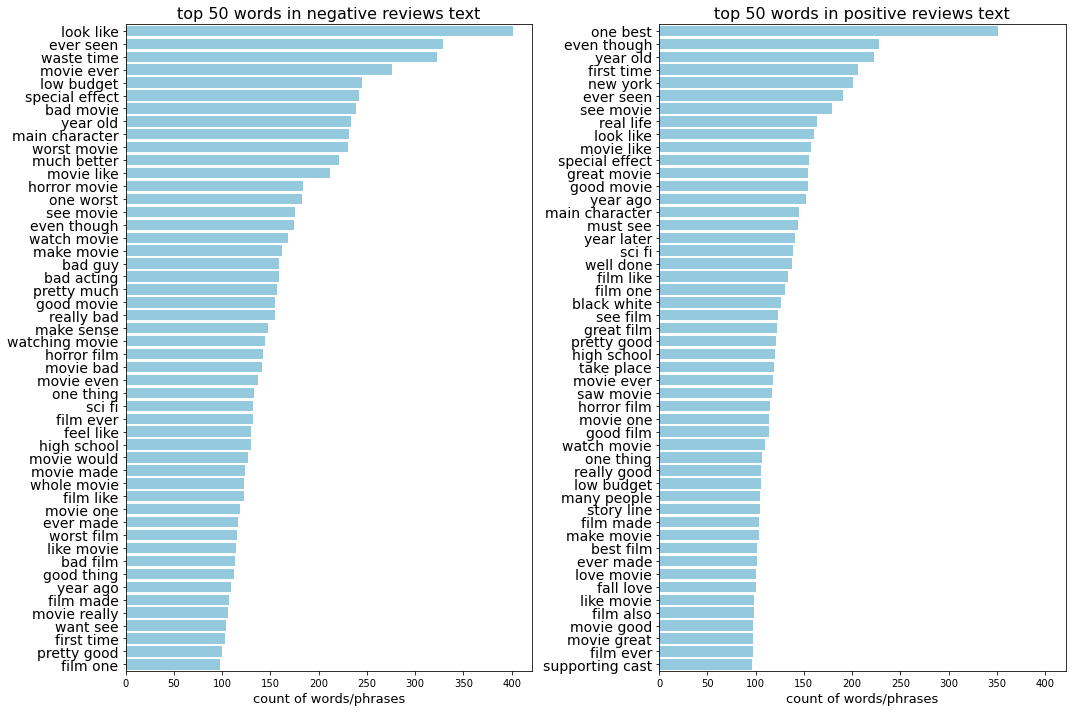

In [60]:
dual_bars_top_50_w_stopwords(df_neg, df_pos, stopwords, 'text')

We used n-grams of 2 words to plot the bar graphs above. N-grams 2 to 3 words only yield 2 words, giving us the exact same result, so we will be excluding that in order to hasten the run time of our code. As for unigram, the words do not give us any meaning of positivity or negativity, and are rather generic words that are shared in both sentiments. N-grams of 2 words gave us the most meaningful result and is thus shown here.

From the bar plots, we can observe some negative phrases that appear in negative reviews, like "waste time", "one worst", "bad movie", "bad acting", "really bad" etc. Negative reviews also contain seemingly positive words like "much better", "good movie", "pretty good", which we presume were used as sarcastic descriptions, or used as comparison to better movies. Sentiment analysis would thus be trickier, as our model later would have a harder time determining sarcasm.

From the positive reviews, we can see a lot more common positive phrases. They include "one best", "great movie", "must see", "well done", "highly recommended". There seemed to be no negative phrases. The reason could be because if a movie is great, they tend to be showered with praises by the reviewers, with less sarcasm involved, or less comparison with movies that may be better. Thus we only see mostly positive phrases and neutral phrases in positive reviews.

Another thing we can observe here is that both sentiments share a lot of common phrases. Most of them are neutral words that do not mean any positivity or negativity. There are some exceptions, like "good movie" and "pretty good", which are seemingly positive sounding. As discussed, these phrases are most likely used for sarcasm or comparison. We will plot a bar plot to explore more of these common phrases that appear in both positive and negative reviews, and see which sentiment they appear in more frequently.

### Comparison of Most Common Phrases in Both Sentiments (With Removal of Stopwords)

We will next explore the common phrases that appear in both positive and negative reviews. We will do a direct comparison based on percentage, to see which sentiment do these phrases appear in more frequently.

In [61]:
# function for common words for entire train dataset
# regardless of positivity or negativity
def bar_top_50_w_stopwords(df, stop, col):

    # instantiate a basic vectoriser with only settings for extracting bi- and tri-grams
    cvec = CountVectorizer(stop_words = stop, ngram_range=(2, 2))

    # fit_transform count vectoriser
    vec = cvec.fit_transform(df[col])
    vec = pd.DataFrame(vec.toarray(), columns = cvec.get_feature_names())

    # get top 50 phrases with highest count
    vec_50 = vec.sum().sort_values(ascending=False).head(50)
    
    # plot results
    plt.figure(figsize = (7,10))
    ax = plt.subplot()
    sns.barplot(y = vec_50.index.values, x = vec_50, color='skyblue')
    ax.set_title(f'top 50 words in reviews {col}', fontsize=16)
    ax.set_xlabel('count of words/phrases', fontsize=13)
    
    plt.tight_layout()

In [62]:
# instantiate a basic vectoriser with only settings for extracting bi- and tri-grams
cvec = CountVectorizer(stop_words = stopwords, ngram_range=(2, 2))

In [63]:
# dataframe 1: fit_transform count vectoriser
df_neg_words = cvec.fit_transform(df_neg['text'])
df_neg_words = pd.DataFrame(df_neg_words.toarray(), columns = cvec.get_feature_names())

# dataframe 1: get top 50 phrases with highest count
df_neg_50 = df_neg_words.sum().sort_values(ascending=False).head(50)

C:\Users\chins\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [64]:
# dataframe 2: fit_transform count vectoriser
df_pos_words = cvec.fit_transform(df_pos['text'])
df_pos_words = pd.DataFrame(df_pos_words.toarray(), columns = cvec.get_feature_names())

# dataframe 2: get top 50 phrases with highest count
df_pos_50 = df_pos_words.sum().sort_values(ascending=False).head(50)

In [65]:
# convert to dataframes
df_neg_ranked = pd.DataFrame(df_neg_50, columns = ['negative']).reset_index()
df_pos_ranked = pd.DataFrame(df_pos_50, columns = ['positive']).reset_index()

# merging both dataframes
df_ranked = pd.merge(df_neg_ranked, df_pos_ranked)

# creating percentage columns for both negative and positive
df_ranked['negative_pct'] = round(df_ranked['negative'] / (df_ranked['negative'] + df_ranked['positive']), 2)
df_ranked['positive_pct'] = round(df_ranked['positive'] / (df_ranked['negative'] + df_ranked['positive']), 2)

# dropping original negative and positive columns
df_ranked.drop(columns = ['negative','positive'], axis = 1, inplace=True)

# ranking them for better visuals
df_ranked.sort_values('negative_pct', inplace=True)

<Figure size 504x720 with 0 Axes>

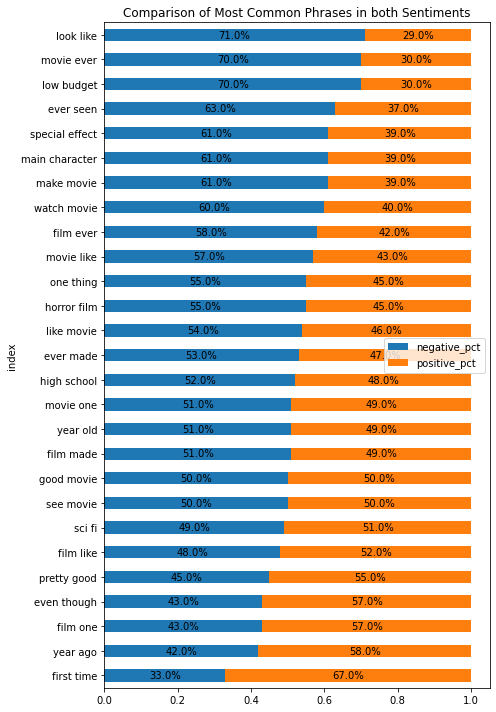

In [66]:
# plotting common words in reviews, sorted by negative and positive
plt.figure(figsize = (7,10))

df_ranked.plot(x = 'index', kind = 'barh', stacked = True,
                title = 'Comparison of Most Common Phrases in both Sentiments',
                mark_right = True, figsize = (7,10))

df_total = df_ranked['negative_pct'] + df_ranked['positive_pct']
df_rel = df_ranked[df_ranked.columns[1:]].div(df_total, 0)*100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df_ranked.iloc[:, 1:].cumsum(1)[n], 
                                         df_ranked[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')
        
plt.tight_layout()

The above bar plot shows us the most common phrases found in both sentiments. They are plotted with percentages so we can see a comparison of frequency in both positive and negative sentiments. Most of the phrases here are mostly neutral sounding phrases. We noticed only 2 seemingly positive phrases: "good movie" and "pretty good".

While the phrase "good movie" appeared seemingly the same frequency for both positive and negative reviews, "pretty good" appear more in positive reviews, which was what we expected, although not by much. Positive phrases in negative reviews could most likely be used as sarcastic remarks that actually contain negative sentiments from the reviewers. Or, the preceding words may be "not a", which would make up "not a good movie".

### Word Cloud

Here, we plot word clouds for both negative and positive reviews for better visualizations of the common phrases.

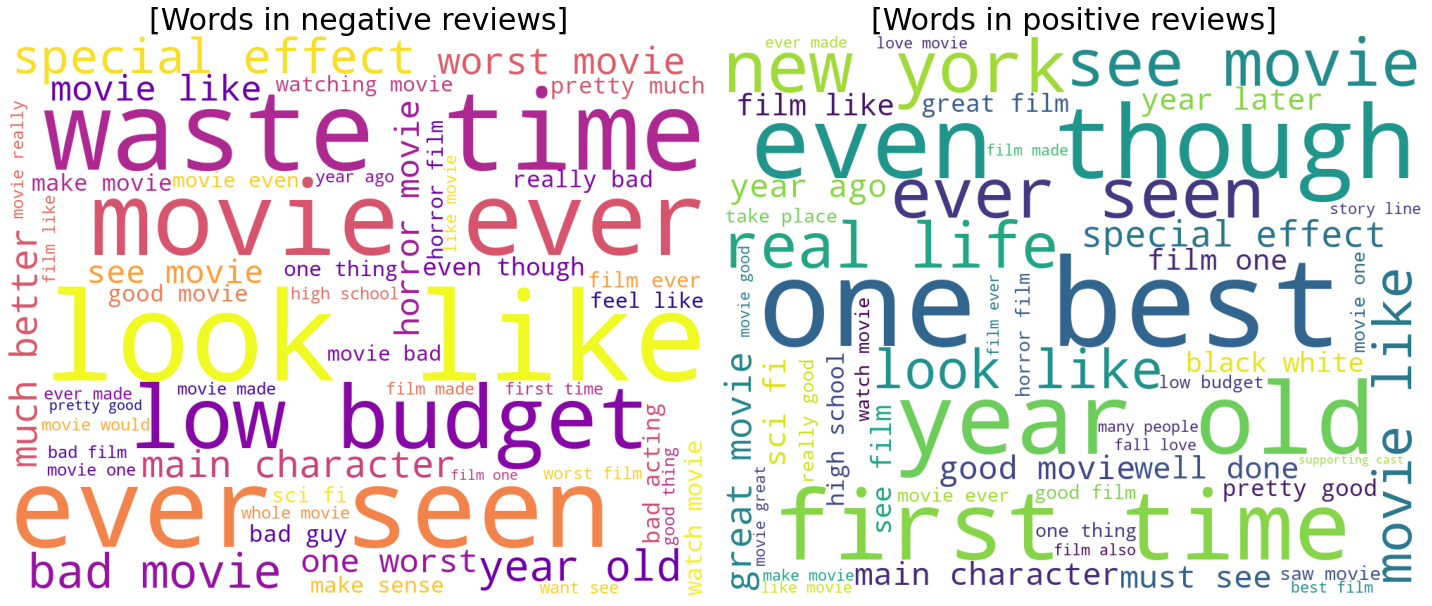

In [67]:
# WordCloud for negative words
wc_neg = WordCloud(max_words= 50, width = 1000, height = 800, background_color ='white',
                  colormap='plasma').generate_from_frequencies(df_neg_50)

# WordCloud for positive words
wc_pos = WordCloud(max_words= 50, width = 1000, height = 800, background_color ='white',
                  colormap='viridis').generate_from_frequencies(df_pos_50)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,13))
plt.subplots_adjust(wspace = 0.6)

ax[0].imshow(wc_neg)
ax[0].axis('off')
ax[0].set_title('[Words in negative reviews]', fontsize = 30)

ax[1].imshow(wc_pos)
ax[1].axis('off')
ax[1].set_title('[Words in positive reviews]', fontsize = 30)
plt.tight_layout();

In the negative reviews word cloud, negative phrases like "waste time" pop out to us. However, this word cloud contains a lot of neutral phrases as well.

For positive reviews word cloud, a lot more positive phrases pop out to us, with lesser neutral phrases and zero negative ones.

## EDA (Without Removal of Stopwords)

Import and preprocess data again for this EDA.

In [68]:
# importing train dataset
train = pd.read_csv('../data/IMBD_Train.csv', nrows = 2000)

In [69]:
preprocess_df(train)

,text,sentiment,rate
0,zero day lead you to think even re think why two boy young men would do what they did commit mutual suicide via slaughtering their classmates. it capture what must be beyond a bizarre mode of being for two human who have decided to withdraw from common civility in order to define their own mutual world via coupled destruction. it is not a perfect movie but given what money time the filmmaker a...,1,10
1,word can't describe how bad this movie is. i can't explain it by writing only. you have too see it for yourself to get at grip of how horrible a movie really can be. not that i recommend you to do that. there are so many clich s mistake and all other negative thing you can imagine here that will just make you cry. to start with the technical first there are a lot of mistake regarding the airpl...,0,1
2,everyone play their part pretty well in this little nice movie . belushi get the chance to live part of his life differently but end up realizing that what he had going to be just a good or maybe even better. the movie show u that we ought to take advantage of the opportunity we have not the one we do not or cannot have. if u can get this movie on video for around it d be an investment,1,10
3,there are a lot of highly talented filmmaker actor in germany now. none of them are associated with this movie . why in the world do producer actually invest money in something like this this you could have made good film with the budget of this garbage it's not entertaining to have seven grown men running around a dwarf pretending to be funny. what is funny though is that the film's producer ...,0,1
4,i've just had the evidence that confirmed my suspicions. a bunch of kid to put on the dvd of titanic on a fantastic state of the art mega screen home entertainment type deal. only two of them had actually seen it before. but they all had seen the moment of kate leo and celine dion so many time that most of them felt they had seen the whole movie. shortly after the epic started they started to ...,0,2
...,...,...,...
1994,the memory bank of most of the reviewer here must've short circuited when trying to recall this cubic zirconia of a gem because practically everyone managed to misquote lloyd bochner's walter thornton when in a fit of peevish anger he hurl the phallic garden nozzle at his new wife jerilee randall thornton a nearly comatose pia zadora which used to sexually assault her earlier in the movie...bu...,0,4
1995,this movie start out very very slow but when the action finally get started it's a little had to follow. i couldn't understand why some of the event were taking place and a lot of event happened before they were explained making them sort of confusing. the only thing it really going for it is the massive amount of blood gore it although most time the special effect are lacking. blood look like...,0,4
1996,stella starring bette midler in the title role is an unabashed tearjerker. set in upstate new york stella claire work night a a bar maid pouring and dancing in a workingman's saloon. one night in come a slumming medical intern stephen dallas who woos stella and in the course of their affair impregnates her. she spurns both his offer of marriage and abortion sends him packing to a lucrative med...,0,3
1997,this movie a homer simpson would have put it more boring than church. maybe i don't understand it well enough and i thought it started out pretty well but after start of spoiler hermann braun is sent to jail and maria start working sleeping with her bos it just started to drag and i struggled to keep awake. again maybe it symbolizes something but the explosion at the end seemed very forced and...,0,2


In [70]:
# splitting main train dataset into each sentiment
df_neg = train[train['sentiment'] == 0].reset_index(drop=True)
df_pos = train[train['sentiment'] == 1].reset_index(drop=True)

### Common Words in Positive and Negative Reviews (No Removal of Stopwords)

In [71]:
# function for dual bar graphs for top 50 words
def dual_bars_top_50_no_stopwords(df1, df2, col):

    # instantiate a basic vectoriser with only settings for extracting bi- and tri-grams
    cvec = CountVectorizer(ngram_range=(2, 3))

    # dataframe 1: fit_transform count vectoriser
    vec1 = cvec.fit_transform(df1[col])
    vec1 = pd.DataFrame(vec1.toarray(), columns = cvec.get_feature_names())

    # dataframe 1: get top 50 phrases with highest count
    vec1_50 = vec1.sum().sort_values(ascending=False).head(50)

    # dataframe 2: fit_transform count vectoriser
    vec2 = cvec.fit_transform(df2[col])
    vec2 = pd.DataFrame(vec2.toarray(), columns = cvec.get_feature_names())

    # dataframe 2: get top 50 phrases with highest count
    vec2_50 = vec2.sum().sort_values(ascending=False).head(50)

    # plot results
    fit, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,10), sharex = True)

    sns.barplot(y = vec1_50.index.values, x = vec1_50, color='skyblue', ax=ax[0])
    ax[0].set_title(f'top 50 words in negative reviews {col}', fontsize=16)
    ax[0].set_xlabel('count of words/phrases', fontsize=13)
    plt.setp(ax[0].get_yticklabels(), fontsize=14)

    sns.barplot(y = vec2_50.index.values, x = vec2_50, color='skyblue', ax=ax[1])
    ax[1].set_title(f'top 50 words in positive reviews {col}', fontsize=16)
    ax[1].set_xlabel('count of words/phrases', fontsize=13)
    plt.setp(ax[1].get_yticklabels(), fontsize=14)

    plt.tight_layout()

C:\Users\chins\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


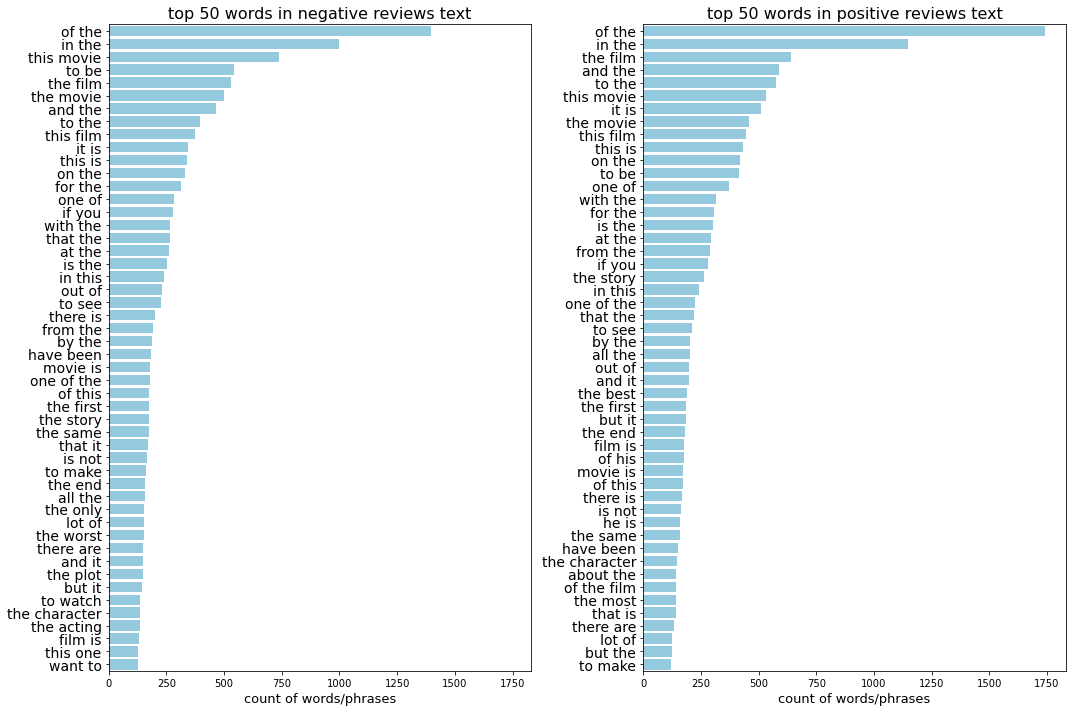

In [72]:
dual_bars_top_50_no_stopwords(df_neg, df_pos, 'text')

From the above top 50 words in the reviews from both sentiments (without removing stopwords), we can see that these words are mostly just connecting words with neutral sentiment. Later on during modelling, we will be using a pipeline that will include both stopwords and without, and see which would make the model more accurate.

## Preprocessing and Export CSV

In [73]:
# importing train and test dataset for preprocess before modeling
train = pd.read_csv('../data/IMBD_Train.csv')
test = pd.read_csv('../data/IMBD_Test.csv')

In [74]:
# applying preprocess function on both datasets
preprocess_df(train);
preprocess_df(test);

In [75]:
train

,text,sentiment,rate
0,zero day lead you to think even re think why two boy young men would do what they did commit mutual suicide via slaughtering their classmates. it capture what must be beyond a bizarre mode of being for two human who have decided to withdraw from common civility in order to define their own mutual world via coupled destruction. it is not a perfect movie but given what money time the filmmaker a...,1,10
1,word can't describe how bad this movie is. i can't explain it by writing only. you have too see it for yourself to get at grip of how horrible a movie really can be. not that i recommend you to do that. there are so many clich s mistake and all other negative thing you can imagine here that will just make you cry. to start with the technical first there are a lot of mistake regarding the airpl...,0,1
2,everyone play their part pretty well in this little nice movie . belushi get the chance to live part of his life differently but end up realizing that what he had going to be just a good or maybe even better. the movie show u that we ought to take advantage of the opportunity we have not the one we do not or cannot have. if u can get this movie on video for around it d be an investment,1,10
3,there are a lot of highly talented filmmaker actor in germany now. none of them are associated with this movie . why in the world do producer actually invest money in something like this this you could have made good film with the budget of this garbage it's not entertaining to have seven grown men running around a dwarf pretending to be funny. what is funny though is that the film's producer ...,0,1
4,i've just had the evidence that confirmed my suspicions. a bunch of kid to put on the dvd of titanic on a fantastic state of the art mega screen home entertainment type deal. only two of them had actually seen it before. but they all had seen the moment of kate leo and celine dion so many time that most of them felt they had seen the whole movie. shortly after the epic started they started to ...,0,2
...,...,...,...
24899,footlight parade released viewed . the ice cream cone is invented in new york. kevin after a long and busy break we hit another busby berkeley musical from warner bros. this time it's the ultra fast paced footlight parade starring james cagney a juggernaut stage producer chester kent. i am certain that cagney channeling berkeley with his performance of the irrepressible kent who to come up wit...,1,8
24900,deeply humorous yet honest comedy about a bunch of grownup bill paxton julie warner kevin pollak elizabeth perkins vincent spano matt craven and diane lane who are invited back to spend a week to tomawka a camp in ontario canada by their former consuelor alan arkin . writer director mike binder drew upon his experience at the same camp a the main source of creating a gentle and understanding y...,1,9
24901,st watched out of dir sydney pollack dvd version i watched titled day of the condor so so cia drama full of laid back performance making for a very laid back movie. the premise of the story revolves around out of member of a cia research group being killed with robert redford's character codename condor being the one that left. who killed them and why that's what redford try to find out while ...,0,4
24902,i watch lot of scary movie or at least they try to be and this to be the worst if not nd worst movie i have ever had to make myself try to sit through. i never knew the depth of masacism until i rented this piece of moldy cheese covered in a used latex contraceptive. i am a fan of julian sans but this is worse than i would hope for him. on the other hand the story promising and i intrigued...f...,0,2


In [76]:
test

,text,sentiment,rate
0,don't hate heather graham because she's beautiful hate her because she's fun to watch in this movie. like the hip clothing and funky surroundings the actor in this flick work well together. casey affleck is hysterical and heather graham literally light up the screen. the minor character goran visnjic sigh and patricia velazquez are a talented a they are gorgeous. congratulation miramax directo...,1,9
1,i don't know how this movie received so many positive comments. one can call it artistic and beautifully filmed but those thing don't make up for the empty plot that filled with sexual innuendos. i wish i had not wasted my time to watch this movie. rather than being biographical it a poor excuse for promoting strange and lewd behavior. it just another hollywood attempt to convince u that that ...,0,1
2,i caught this movie on the horror channel and quite impressed by the film's gothic atmosphere and tone. a a big fan of all thing vampire related i am always happy to see a new variation of the vampire mythos in this case a ghoul like creature residing in a lovecraftian other dimension. the director done a brilliant job of conveying the dark mood of the subject using the decadent art scene a a ...,1,8
3,nbc had a chance to make a powerful religious epic along the line of the ten commandment and the greatest story ever told and instead they chose to make some halfhearted cartoon that more like waterworld than anything else. i don't recall a bible passage where lot turn into a pirate and attack the ark nor do i remember one where noah's son develops a serious friendship with an orange nor do i ...,0,1
4,looking for something shocking okay fine... the imagery is that. that's about it. this film attempt to make deep connection with the audience through various symbolism and just end up being annoying. i am not quite sure if the director's purpose to truly portray some sort of deep message to his audience or if he just sought to shock the hell out of them with gore sex and violence. i am thinkin...,0,1
...,...,...,...
24796,after watching tipping the velvet by sarah water i decided to watch fingersmith the character were just a good in both performance though missing rachael stirling in the adaptation of fingersmith. the story line overall of a good choice the twisting and the unravelling of the character were amazing excellent watch only missing rachael stirling if you do enjoy the romance of two girl this isn't...,1,9
24797,the three main character are all hopeless and yet you only feel sorry for one of them ernesto hopelessly devoted to mercedes. this part of the frustration screaming at mercedes to get a clue and ditch the no good harry to no avail. then there's the satisfaction steve buscemi a great part a a transvestite and harvey keitel's moving story of his indignity playing a gorilla for a cheap tv movie i...,1,8
24798,i haven't reviewed on imdb before but this documentary is so overrated that i felt compelled to vent. i wouldn't have even finished watching if i hadn't been a guest at someone's house. the film poor on many level first treadwell's video footage contrived. the more i watched the more he seemed to be acting a a person desperate to be famous instead of one acting out of conviction. second the ot...,0,2
24799,forget what i said about emeril. rachael ray is the most irritating personality on the food network and all of television. if you've never seen minute meal then you cannot possibly begin to comprehend how unfathomably annoying she is. i really truly meant that you can't even begin to be boggled by her until you've viewed the show once or twice and even then all word and intelligent thought wil...,0,1


In [77]:
# saving cleaned datasets as CSV
train.to_csv('../data/train_cleaned.csv')
test.to_csv('../data/test_cleaned.csv')